<a href="https://colab.research.google.com/github/Manojpatil123/self-project/blob/main/Self_Project_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [471]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [472]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [473]:
#importing csv file
df=pd.read_csv("/content/drive/MyDrive/data/CAR DETAILS FROM CAR DEKHO.csv")

In [474]:
#looking into data
df.head(14)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [475]:
df.shape

(4340, 8)

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


checking duplicate rows

In [477]:
len(df[df.duplicated()])

763

we have 763 rows duplicated we need to remove that

In [478]:
df.drop_duplicates(inplace=True)

# Data Set information

name- name of the car(categorical)

year- year in which car buyed(numerical)

selling price- selling price of the car (numerical)( dependent feature)

km driven-total distance driven(numeric)

fuel- fuel type(categorical)

seller_type-information of seller type(categorical)

transmission-transmission type of car(categorical)

owner- owner detalis(categorical)



In [479]:
#checking statistics of each feature
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,3577,3577.000000,3.577000e+03,3577.000000,3577,3577,3577,3577
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,54,NaN,NaN,NaN,1800,2832,3265,2218
mean,NaN,2012.962538,4.739125e+05,69250.545709,NaN,NaN,NaN,NaN
std,NaN,4.251759,5.093018e+05,47579.940016,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2010.000000,2.000000e+05,36000.000000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [480]:
#checking duplicate rows
df.duplicated().sum()

0

In [481]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

# EDA

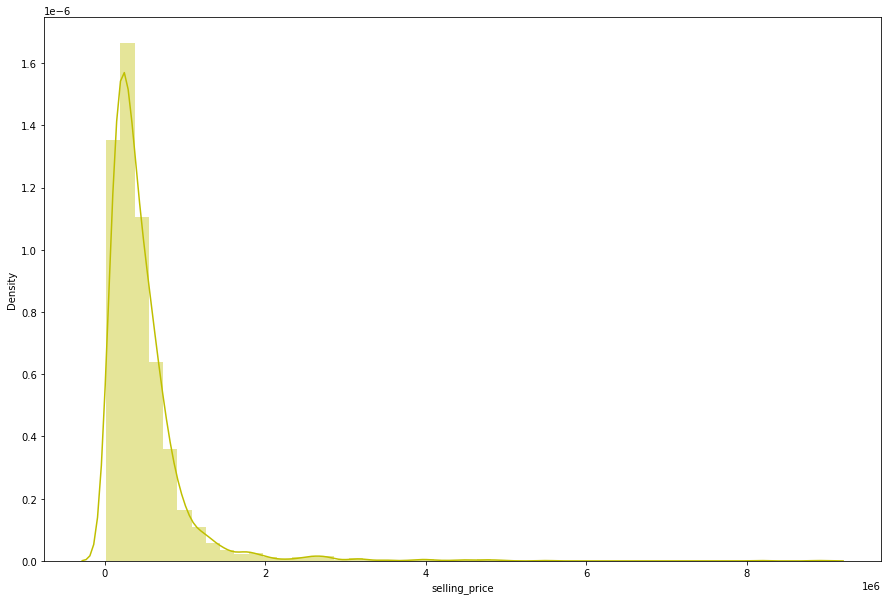

In [482]:
# Dependent variable 'Price'
plt.figure(figsize=(15,10))
sns.distplot(df['selling_price'],color="y")

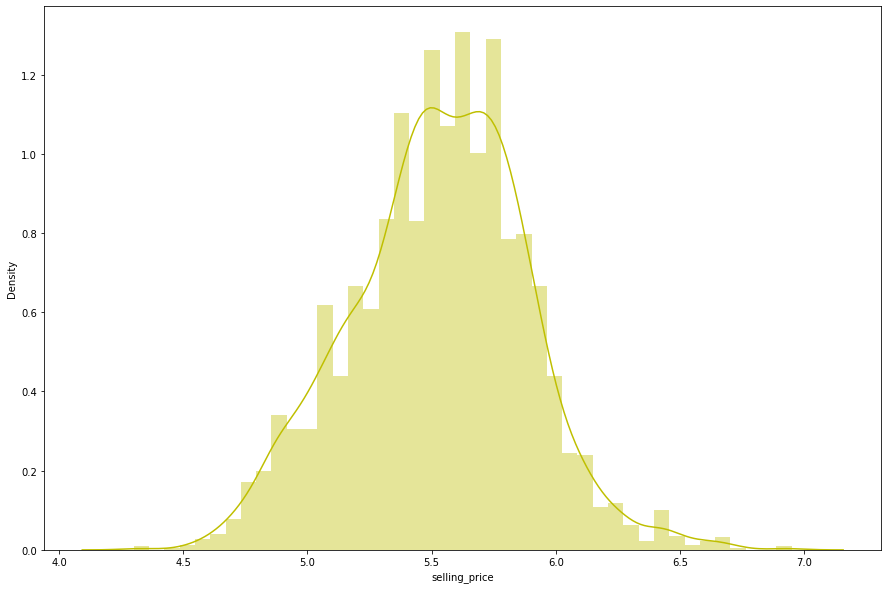

In [483]:
# Dependent variable 'Price'
plt.figure(figsize=(15,10))
sns.distplot(np.log10(df['selling_price']),color="y")

In [484]:
numeric_features = df.describe().columns

In [485]:
#numerical features in the data set
numeric_features=numeric_features.drop('selling_price')

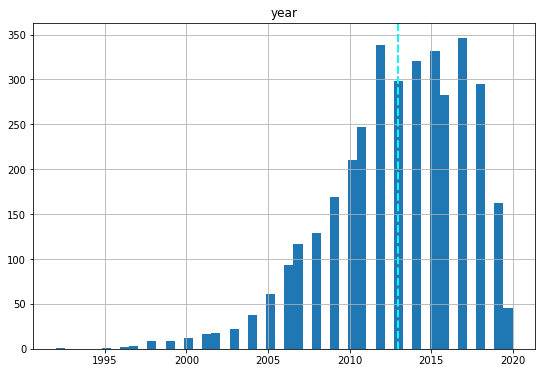

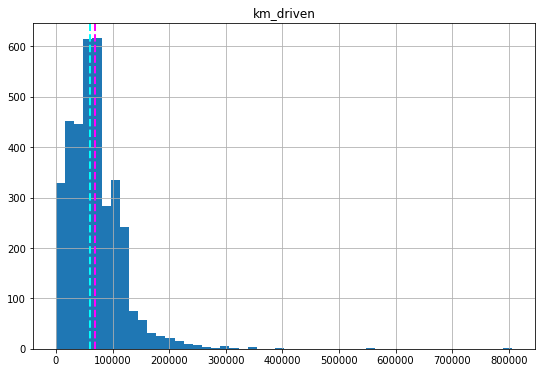

In [486]:
# plot a bar plot for each NUMERICAL feature count 
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

HERE DATA IS NOT NORMAL DISTRIBUTION

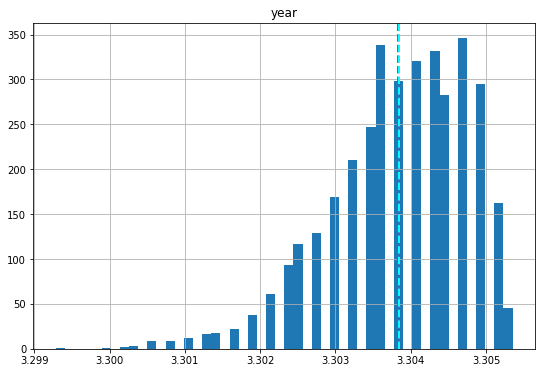

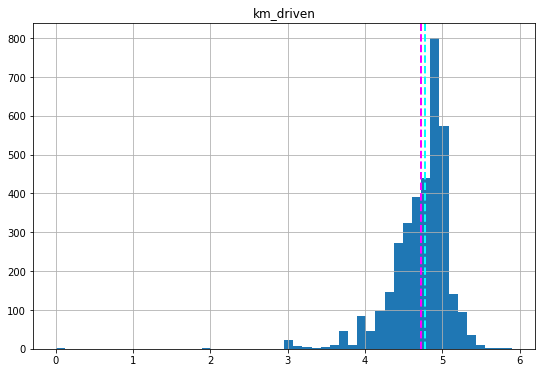

In [487]:
# plot a bar plot for each NUMERICAL feature count 

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log10(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()


after using log10 transformation its become left skewed

using sqrt(x) transformation

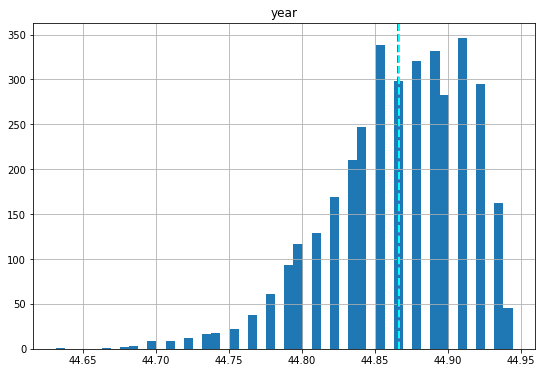

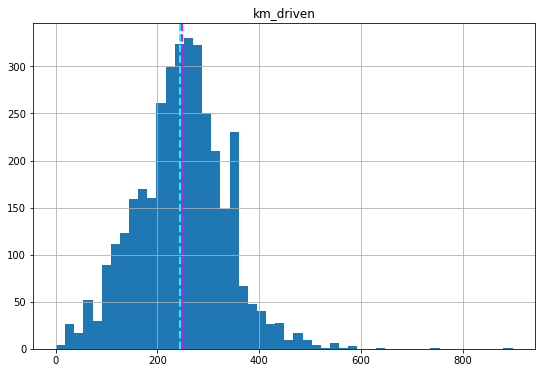

In [488]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()


using 1/x transformation

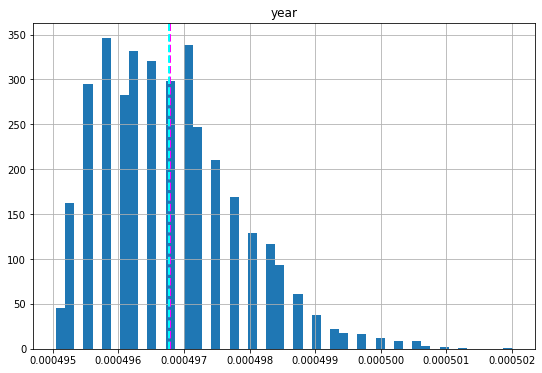

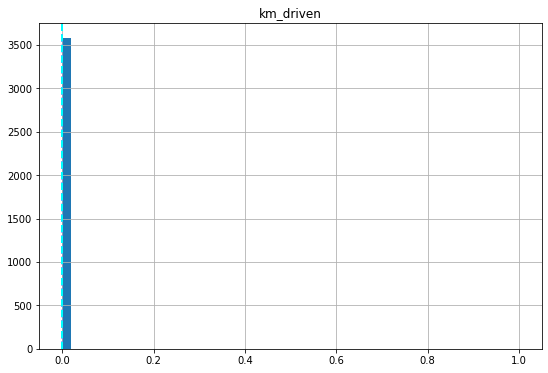

In [489]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = 1/(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

consider sqrt transformation here year column is not normal still we condiser that column becouse its important for predicting

checking relation between data

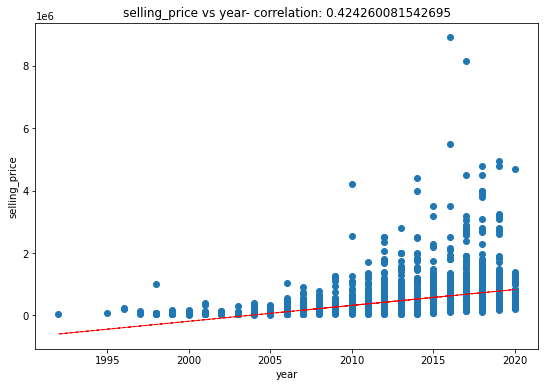

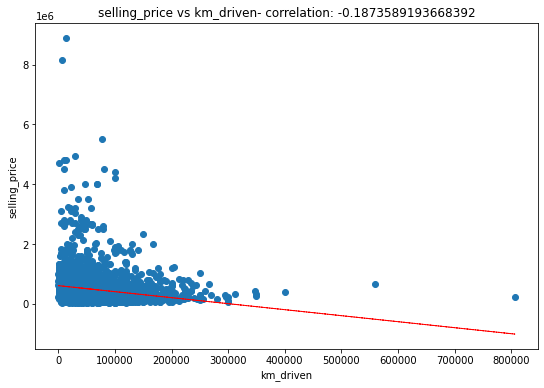

In [490]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['selling_price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('selling_price')
    ax.set_title('selling_price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['selling_price'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

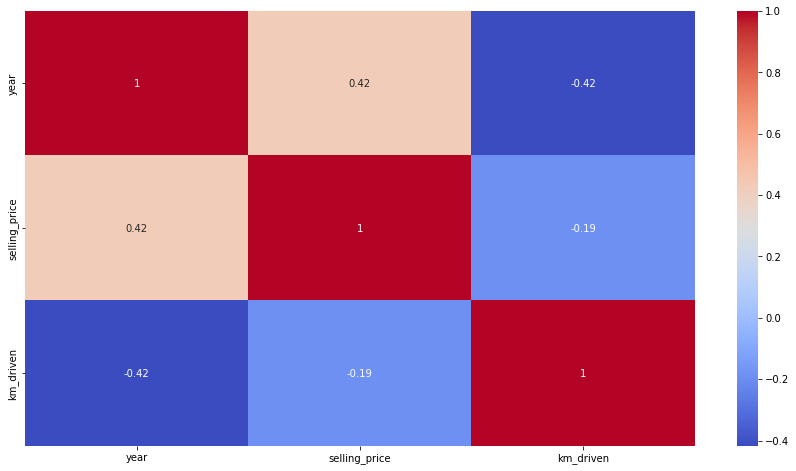

In [491]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [492]:
correlation.selling_price

year             0.424260
selling_price    1.000000
km_driven       -0.187359
Name: selling_price, dtype: float64

there is no much correlation between independent variable so no multicollear

checking multicollear with vif method 

In [493]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [494]:
calc_vif(df[[i for i in df.describe().columns if i not in ['selling_price']]])

,variables,VIF
0,year,3.110934
1,km_driven,3.110934


vif is less than 10 so we need to consider both feature

In [495]:
numeric_features

Index(['year', 'km_driven'], dtype='object')

# data cleaning

In [496]:
df.name.unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

conisder only company name

In [497]:
df['company']=df["name"].str.split(" ", expand=True)[0]

In [498]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [499]:
df.company.value_counts()

Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Jaguar              5
Mitsubishi          5
Land                5
Volvo               4
Jeep                3
Ambassador          3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: company, dtype: int64

In [500]:
df.company=df.company.replace({"Land":"Land Rover"})

checking categorical features

In [501]:
categorical_features = df.describe(include=['object']).columns
categorical_features

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'company'], dtype='object')

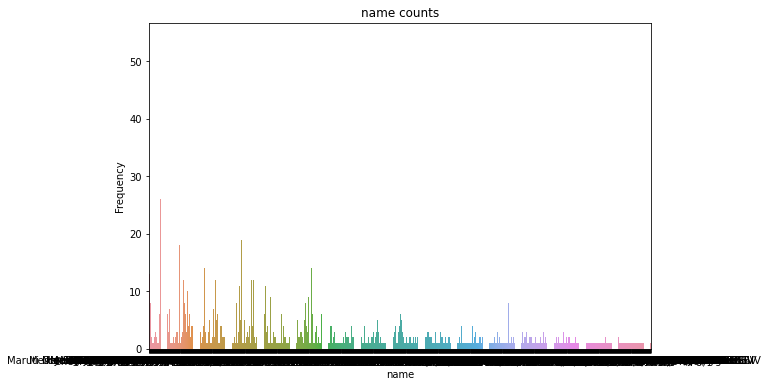

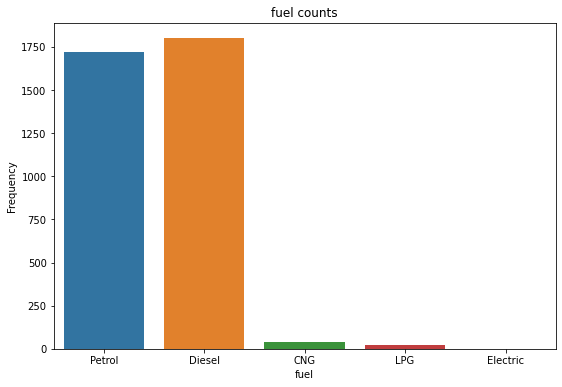

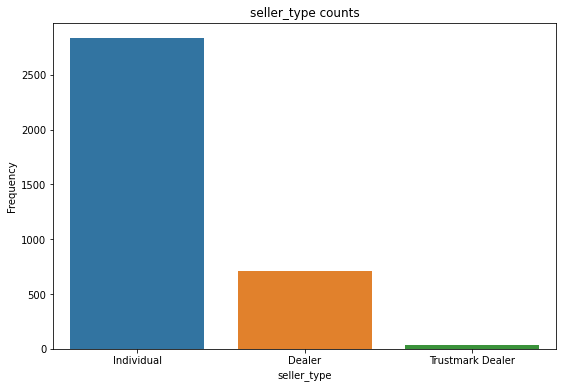

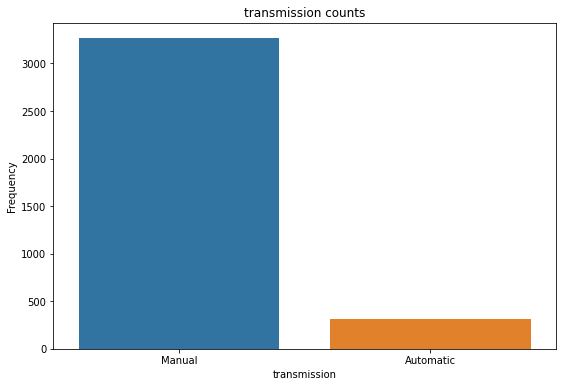

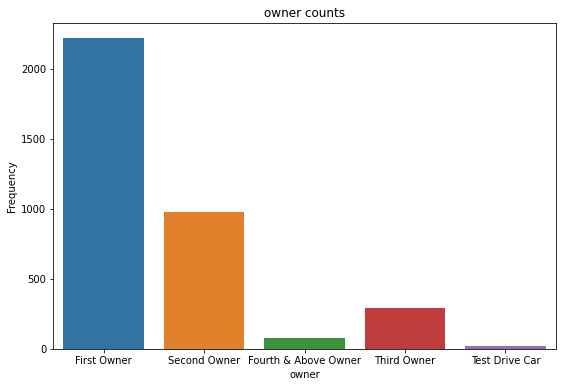

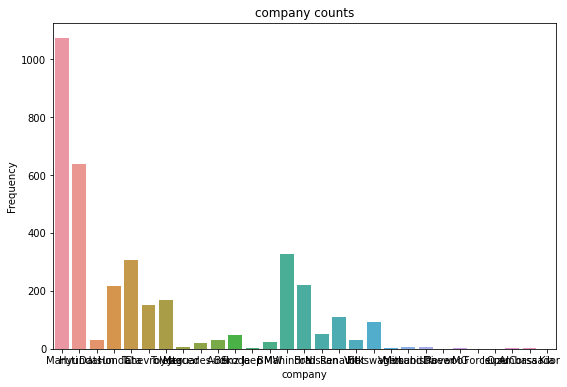

In [502]:
#ploting count plot for categorical features
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    a=sns.countplot(x =col, data = df)
    a.set_title(col + ' counts')
    a.set_xlabel(col) 
    a.set_ylabel("Frequency")
plt.show()

using box plot checking outliers

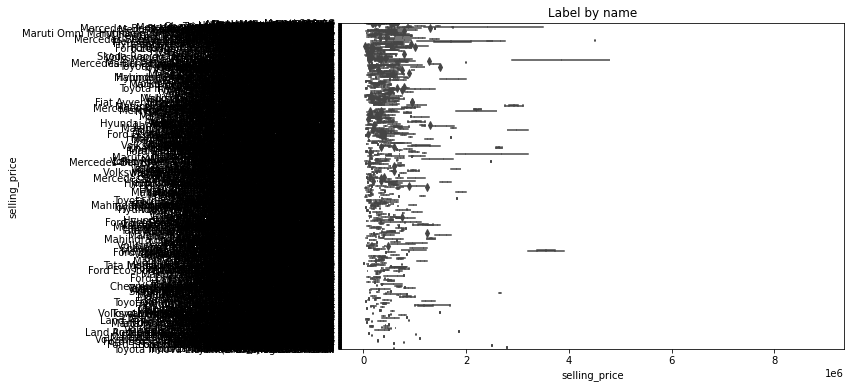

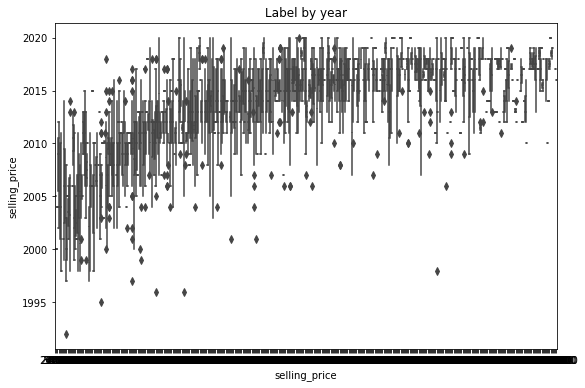

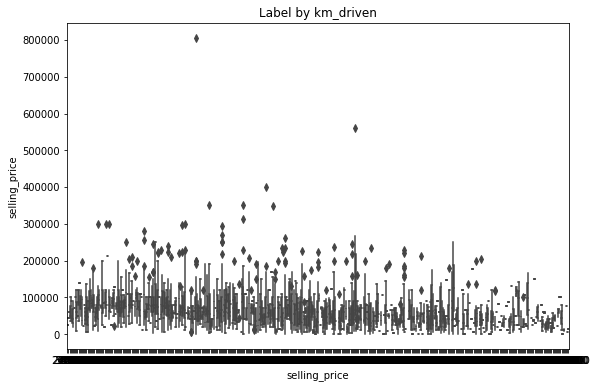

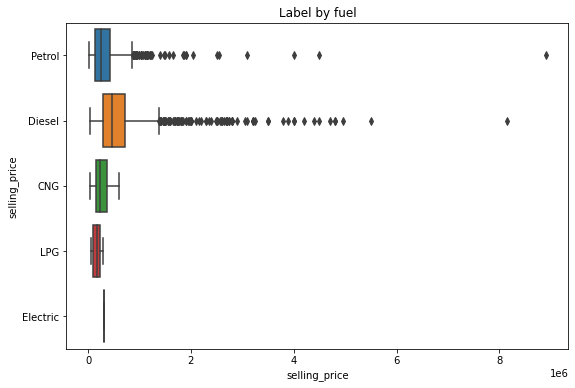

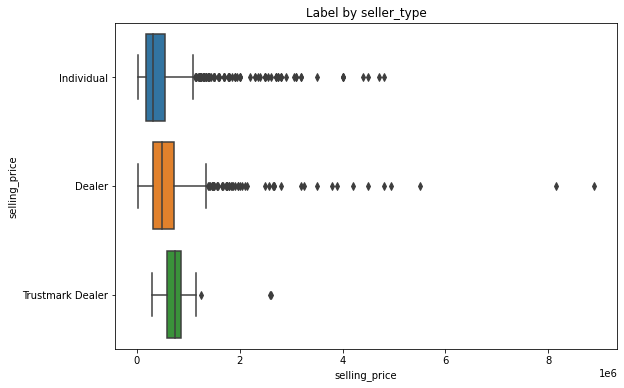

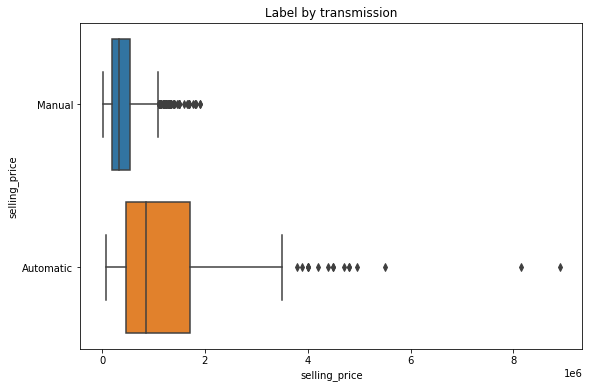

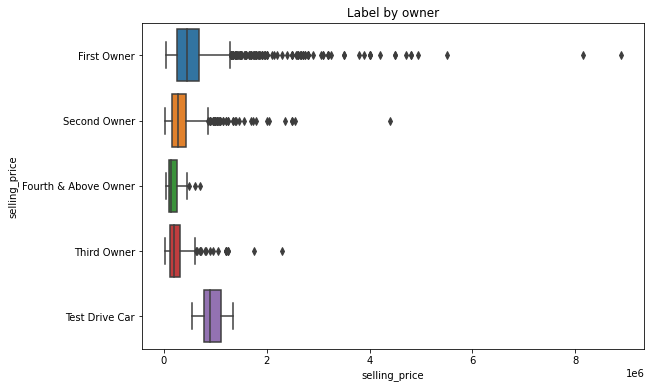

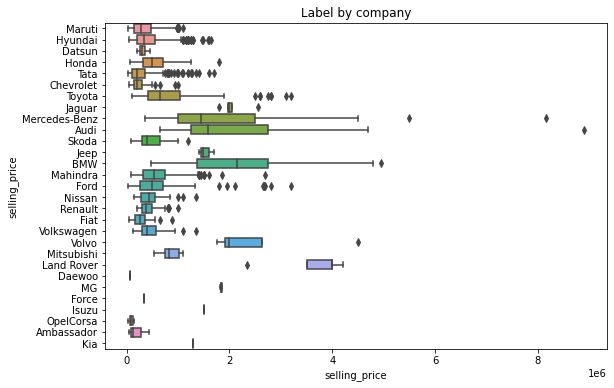

In [503]:
# plot a boxplot for the label by each categorical feature  

for col in df.columns:
  if(col!='selling_price'):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(df['selling_price'], df[col], ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("selling_price")
plt.show()

In [504]:
#checking null values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
company          0
dtype: int64

in our data no null values present

# removing outliers

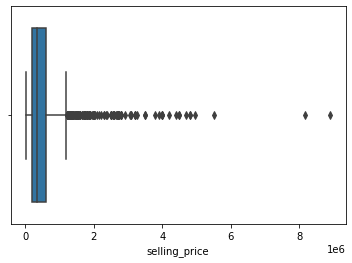

In [505]:
sns.boxplot(df['selling_price'])

there are lot of outliers present in the dataset

In [506]:
percentile_q1 = np.percentile(df['selling_price'],25)
print(percentile_q1)
percentile_q2 = np.percentile(df['selling_price'],50)
print(percentile_q2)
percentile_q3 = np.percentile(df['selling_price'],75)
print(percentile_q3)

200000.0
350000.0
600000.0


In [507]:
iq_range =  percentile_q3 - percentile_q1
iq_range

400000.0

In [508]:
upper=percentile_q3+1.5*iq_range
lower=percentile_q1-1.5*iq_range
print(upper,lower)

1200000.0 -400000.0


In [509]:
df=df[(df['selling_price']<=upper)]

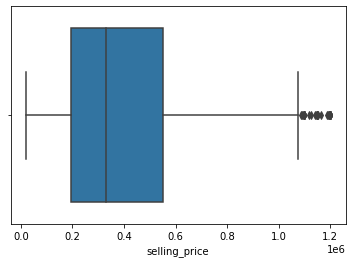

In [510]:
sns.boxplot(df['selling_price'])

now checking once again outliers with each columns

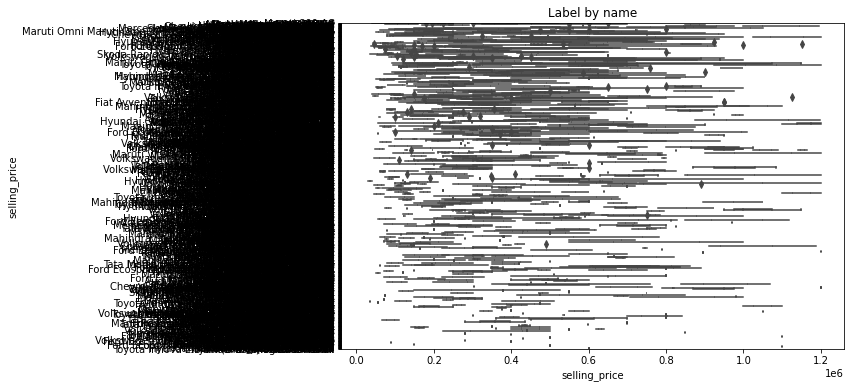

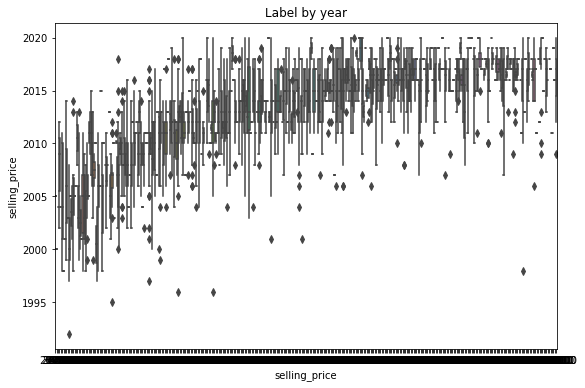

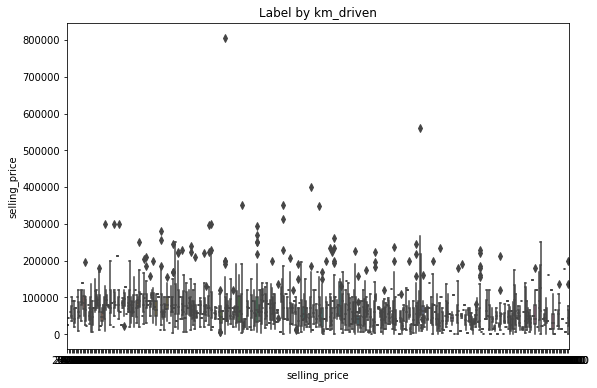

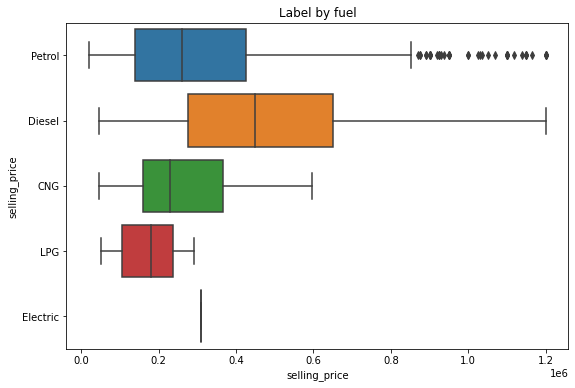

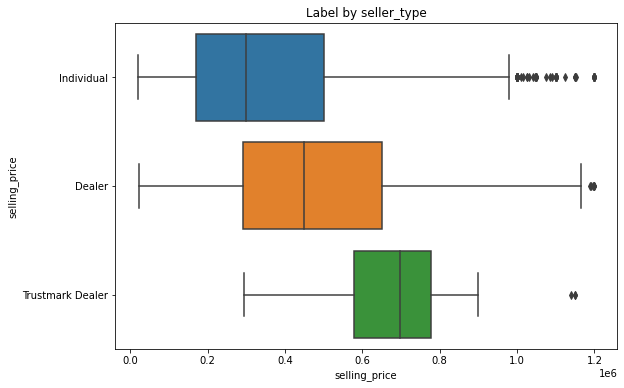

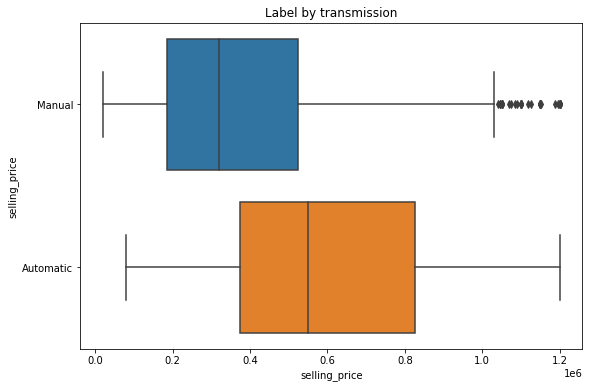

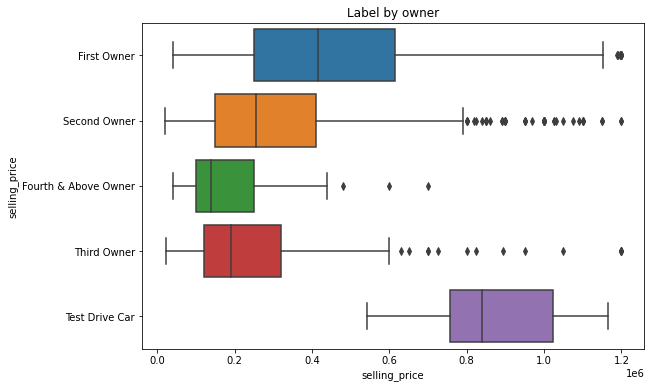

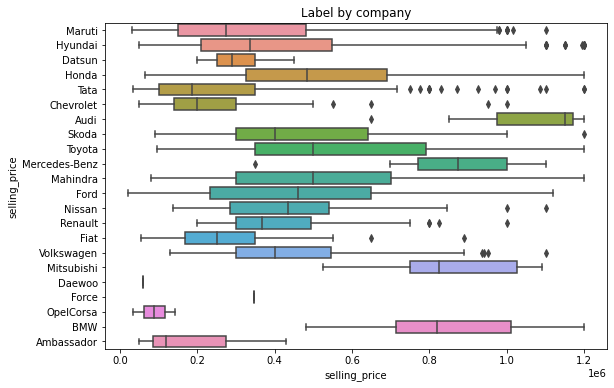

In [511]:
# plot a boxplot for the label by each categorical feature  

for col in df.columns:
  if(col!='selling_price'):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(df['selling_price'], df[col], ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("selling_price")
plt.show()

# feature engineering

In [512]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [513]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [514]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [515]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [516]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [569]:
### Data encoding
#label encoding
encoders_nums = {"fuel":{"Petrol":1,"Diesel":2,"CNG":3,"LPG":4,"Electric":5},
                 "seller_type":{"Individual":1,"Dealer":2,"Trustmark Dealer":3},
                 "transmission":{"Manual": 1, "Automatic": 2},
                 "owner":{"First Owner":1,"Second Owner":2,"Third Owner":3,"Fourth & Above Owner":4,'Test Drive Car':5}}
                  

df1 = df.replace(encoders_nums)

In [570]:
df1= pd.get_dummies(df1, columns=["fuel","seller_type","transmission","owner"], prefix=["fuel","seller_type","transmission","owner"])

In [571]:
df1.head()

,name,year,selling_price,km_driven,company,fuel_1,fuel_2,fuel_3,fuel_4,fuel_5,seller_type_1,seller_type_2,seller_type_3,transmission_1,transmission_2,owner_1,owner_2,owner_3,owner_4,owner_5
0,Maruti 800 AC,2007,60000,70000,Maruti,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Maruti,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Hyundai,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,Datsun,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Honda,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0


In [572]:
df1.shape

(3407, 20)

In [573]:
df1.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
company           0
fuel_1            0
fuel_2            0
fuel_3            0
fuel_4            0
fuel_5            0
seller_type_1     0
seller_type_2     0
seller_type_3     0
transmission_1    0
transmission_2    0
owner_1           0
owner_2           0
owner_3           0
owner_4           0
owner_5           0
dtype: int64

In [574]:
features = df1.describe().columns
features=features.drop('selling_price')
features

Index(['year', 'km_driven', 'fuel_1', 'fuel_2', 'fuel_3', 'fuel_4', 'fuel_5',
       'seller_type_1', 'seller_type_2', 'seller_type_3', 'transmission_1',
       'transmission_2', 'owner_1', 'owner_2', 'owner_3', 'owner_4',
       'owner_5'],
      dtype='object')

splitting data to train and test

In [575]:
y = np.log10(df1['selling_price'])

In [592]:
from scipy.stats import zscore

#x=df1[features].apply(zscore)
x=df1[features]

In [593]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(2725, 17)
(682, 17)


In [594]:
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [595]:
X_train

array([[ 0.98433157, -0.22410896, -0.99086739, ..., -0.30433911,
        -0.14485041, -0.06366363],
       [ 0.27753222, -0.0139207 , -0.99086739, ..., -0.30433911,
        -0.14485041, -0.06366363],
       [-1.37166626,  0.07400105,  1.00921678, ..., -0.30433911,
        -0.14485041, -0.06366363],
       ...,
       [-0.19366735,  0.19626756, -0.99086739, ...,  3.28580839,
        -0.14485041, -0.06366363],
       [ 0.74873179, -0.20674741,  1.00921678, ..., -0.30433911,
        -0.14485041, -0.06366363],
       [ 0.74873179, -0.22410896, -0.99086739, ..., -0.30433911,
        -0.14485041, -0.06366363]])

# linear regression

In [596]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [597]:
regressor.score(X_train, y_train)

0.6442092338572831

In [598]:
regressor.coef_

array([ 2.01720994e-01,  2.39537592e-04, -3.74754078e+11, -3.74612326e+11,
       -8.07460524e+10, -6.23690071e+10, -1.43559417e+10, -3.52046638e+11,
       -3.46787978e+11, -7.72308103e+10, -5.75633121e+10, -5.75633121e+10,
        3.77135730e+12,  3.47910975e+12,  2.15145801e+12,  1.09583953e+12,
        4.89756180e+11])

In [599]:
y_pred = regressor.predict(X_test)

In [600]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 26752260809.35706
RMSE : 163561.18368780857


In [601]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.532849242912815
Adjusted R2 :  0.5208890578669081


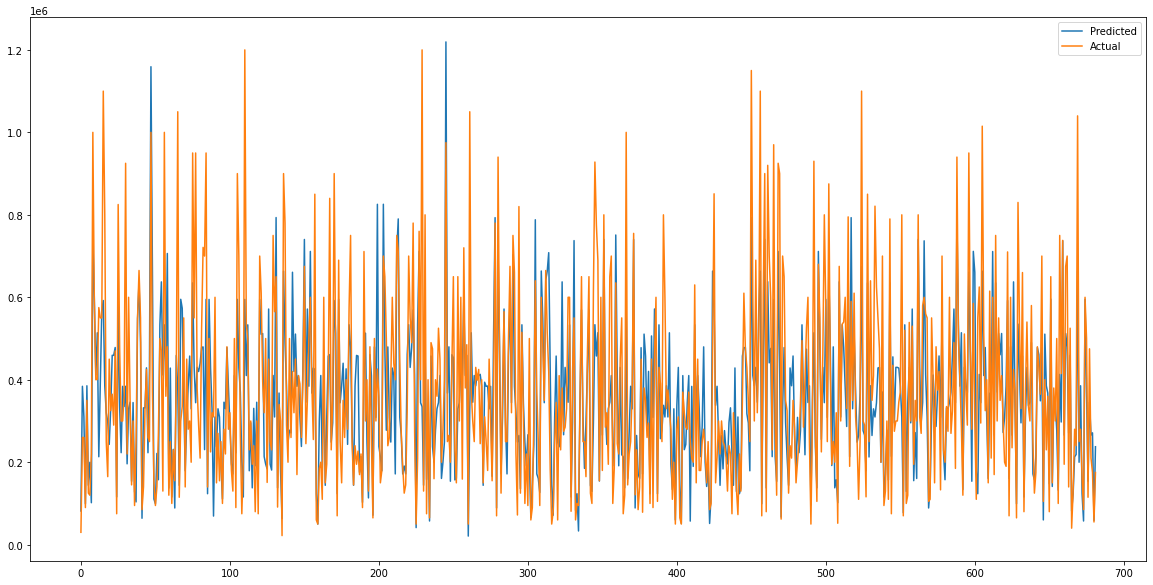

In [603]:
plt.figure(figsize=(20,10))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### Lasso regression

In [604]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [605]:
lasso.score(X_train, y_train)

0.42476887321154666

In [606]:
y_pred_l = lasso.predict(X_test)

In [607]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 41786225256.41386
RMSE : 204416.79299023811
R2 : 0.2703245941172281
Adjusted R2 :  0.251643145472639


In [608]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [609]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.036662244034591895


In [610]:
y_pred_lasso = lasso_regressor.predict(X_test)

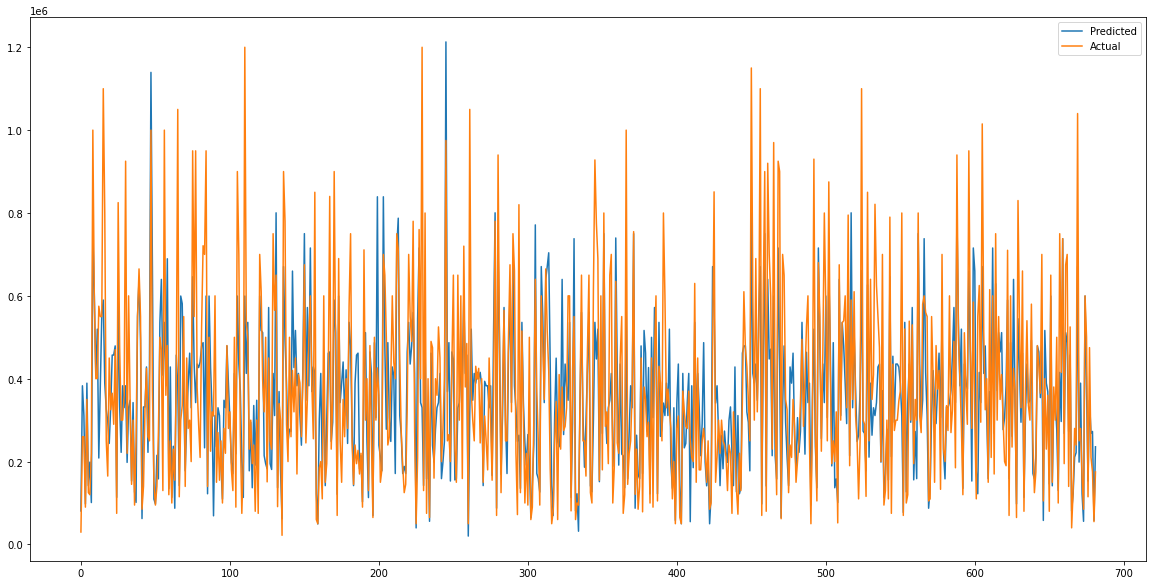

In [612]:
plt.figure(figsize=(20,10))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [613]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 26737216309.07022
RMSE : 163515.18678419513
R2 : 0.5331119515395393
Adjusted R2 :  0.5211584924675093


### Ridge Regression

In [614]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [615]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [616]:
y_pred_r = ridge.predict(X_test)

In [617]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 26718195672.34255
RMSE : 163457.01475416266
R2 : 0.5334440918738061
Adjusted R2 :  0.5214991363946716


In [618]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [619]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-10}

Using  {'alpha': 1e-10}  the negative mean squared error is:  -0.036682720750438734


In [620]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [621]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 26718175835.517548
RMSE : 163456.95407512508
R2 : 0.5334444382665047
Adjusted R2 :  0.521499491655858


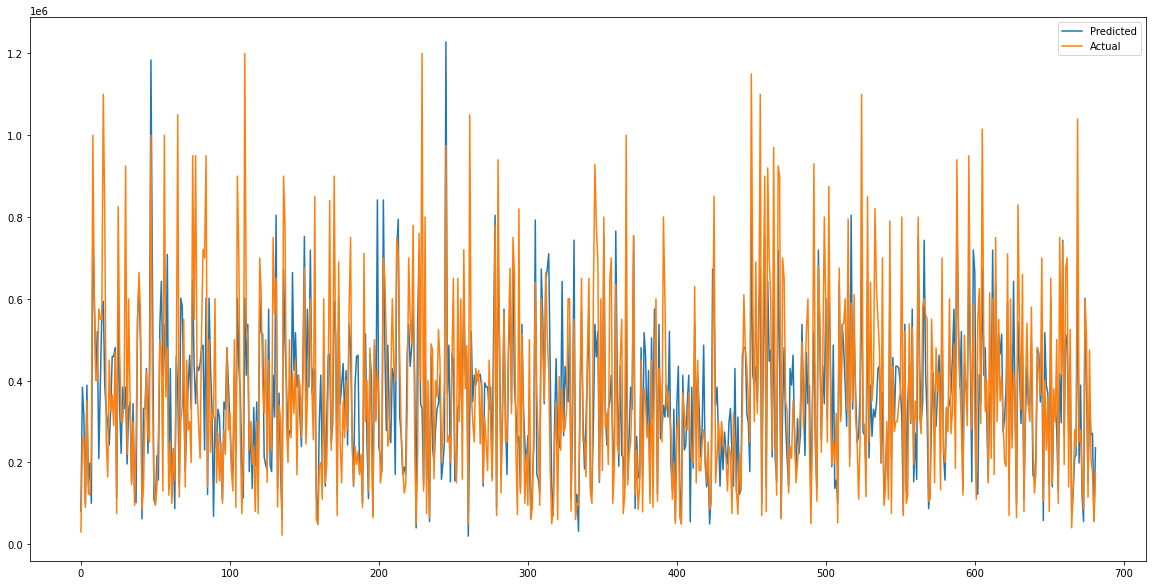

In [624]:
plt.figure(figsize=(20,10))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()